In [107]:
import pandas as pd
import numpy as np

In [108]:
cropdf = pd.read_csv("Crop_recommendation.csv")

In [109]:
cropdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [110]:
cropdf.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [111]:
cropdf.duplicated().sum()

0

In [112]:
cropdf.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

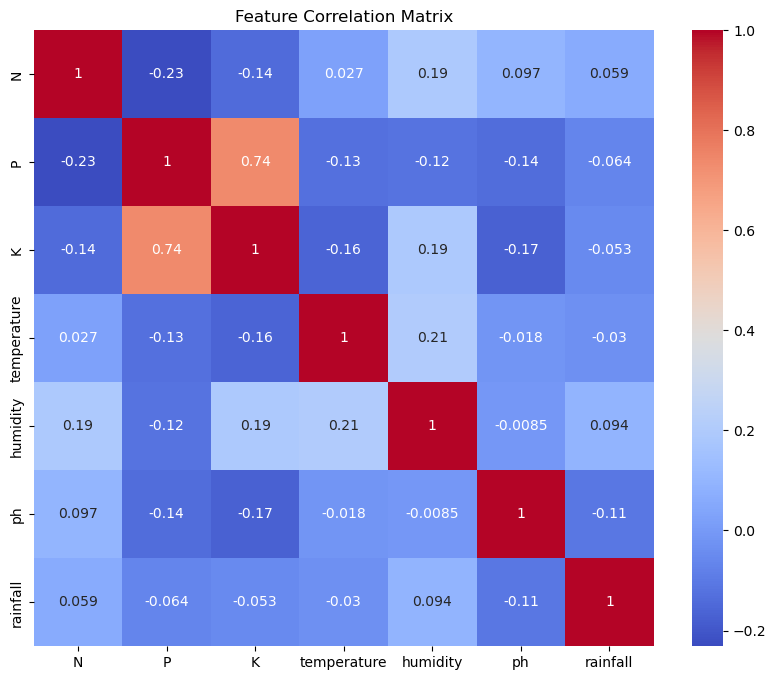

In [114]:
corr_matrix = cropdf.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


C:\Users\Manan Computer\AppData\Local\Temp\ipykernel_27464\3940735412.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cropdf['K'])


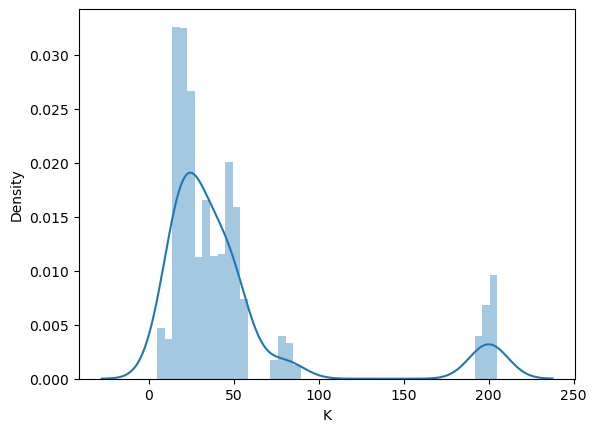

In [115]:
sns.distplot(cropdf['K'])
plt.show()

In [116]:
label_dict = {label: i for i, label in enumerate(cropdf['label'].unique(),start=1)}
print(label_dict)


{'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5, 'mothbeans': 6, 'mungbean': 7, 'blackgram': 8, 'lentil': 9, 'pomegranate': 10, 'banana': 11, 'mango': 12, 'grapes': 13, 'watermelon': 14, 'muskmelon': 15, 'apple': 16, 'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20, 'jute': 21, 'coffee': 22}


In [117]:
cropdf['label'] = cropdf['label'].map(label_dict)

In [118]:
cropdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [119]:
print(cropdf)

        N   P   K  temperature   humidity        ph    rainfall  label
0      90  42  43    20.879744  82.002744  6.502985  202.935536      1
1      85  58  41    21.770462  80.319644  7.038096  226.655537      1
2      60  55  44    23.004459  82.320763  7.840207  263.964248      1
3      74  35  40    26.491096  80.158363  6.980401  242.864034      1
4      78  42  42    20.130175  81.604873  7.628473  262.717340      1
...   ...  ..  ..          ...        ...       ...         ...    ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507     22
2196   99  15  27    27.417112  56.636362  6.086922  127.924610     22
2197  118  33  30    24.131797  67.225123  6.362608  173.322839     22
2198  117  32  34    26.272418  52.127394  6.758793  127.175293     22
2199  104  18  30    23.603016  60.396475  6.779833  140.937041     22

[2200 rows x 8 columns]


In [120]:
cropdf.label.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [121]:
x=cropdf.drop('label' , axis = 1)
y = cropdf['label']

In [122]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [123]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [126]:
x_train.shape

(1760, 7)

In [127]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

x_train = mx.fit_transform(x_train)
x_test = mx.transform(x_test)


In [128]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier , AdaBoostClassifier
from sklearn.metrics import accuracy_score  


In [131]:
models = {
   'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
    
}


In [132]:
for name,model in models.items():
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test , y_pred)
    print(f"{name} model with accuracy : {score}")

LogisticRegression model with accuracy : 0.9636363636363636
GaussianNB model with accuracy : 0.9954545454545455
SVC model with accuracy : 0.9681818181818181
KNeighborsClassifier model with accuracy : 0.9659090909090909
DecisionTreeClassifier model with accuracy : 0.9886363636363636
ExtraTreeClassifier model with accuracy : 0.9227272727272727
RandomForestClassifier model with accuracy : 0.9931818181818182
BaggingClassifier model with accuracy : 0.9886363636363636
GradientBoostingClassifier model with accuracy : 0.9818181818181818
AdaBoostClassifier model with accuracy : 0.09545454545454546


D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [133]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.9931818181818182

In [134]:
reverse_label_dict = {v: k for k, v in label_dict.items()}

In [135]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    mx_features = mx.transform(features)
    sc_mx_features = sc.transform(mx_features)
    prediction = rfc.predict(sc_mx_features)
    
    crop_name = reverse_label_dict[prediction[0]]
    return crop_name


In [136]:
result = recommendation(71, 60, 22, 26, 60, 6.2, 85)
print("Recommended Crop:", result)


Recommended Crop: maize


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [137]:
import joblib
joblib.dump(reverse_label_dict, "reverse_label_dict.pkl")


['reverse_label_dict.pkl']

In [138]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
pickle.dump(mx,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standardscaler.pkl','wb'))

In [139]:
pip install flask

Note: you may need to restart the kernel to use updated packages.
